In [1]:
# import dependancies
from config import password, user_name, api_key
import json
from pprint import pprint
import requests
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# determine the url for the api
url = 'https://api.rainforestapi.com/request'

In [3]:
# set up the request parameters
params = {
  'api_key': api_key,
  'type': 'bestsellers',
  'amazon_domain': 'amazon.ca',
  'category_id': 'bestsellers_electronics',
  'max_page': '5'
}

In [4]:
# make the http GET request to Rainforest API
response = requests.get(url, params=params)

if response.status_code == 200:
    data = response.json()
    # Process the JSON response
    print(data)
else:
    print('Error:', response.status_code)

{'request_info': {'success': True, 'credits_used': 21, 'credits_used_this_request': 1, 'credits_remaining': 479, 'credits_reset_at': '2024-05-18T23:56:33.000Z'}, 'request_parameters': {'type': 'bestsellers', 'amazon_domain': 'amazon.ca', 'category_id': 'bestsellers_electronics', 'max_page': '5'}, 'request_metadata': {'created_at': '2024-04-22T02:26:05.292Z', 'processed_at': '2024-04-22T02:26:13.108Z', 'total_time_taken': 7.82, 'pages': [{'created_at': '2024-04-22T02:26:05.292Z', 'processed_at': '2024-04-22T02:26:13.108Z', 'total_time_taken': 7.82, 'page': 1, 'amazon_url': 'https://www.amazon.ca/Best-Sellers-Electronics/zgbs/electronics/ref=zg_bs_nav_0'}]}, 'bestsellers': [{'rank': 1, 'position': 1, 'title': 'All-new Amazon Fire TV Stick 4K streaming device, more than 700,000 movies and TV episodes, supports Wi-Fi 6, watch free & li', 'asin': 'B0BXFV1R3S', 'link': 'https://www.amazon.ca/All-new-Amazon-streaming-device-support/dp/B0BXFV1R3S/ref=zg_bs_g_electronics_d_sccl_1/145-1342169-01

In [5]:
# pretty print the JSON response from Rainforest API
pprint(json.dumps(response.json()))

('{"request_info": {"success": true, "credits_used": 21, '
 '"credits_used_this_request": 1, "credits_remaining": 479, '
 '"credits_reset_at": "2024-05-18T23:56:33.000Z"}, "request_parameters": '
 '{"type": "bestsellers", "amazon_domain": "amazon.ca", "category_id": '
 '"bestsellers_electronics", "max_page": "5"}, "request_metadata": '
 '{"created_at": "2024-04-22T02:26:05.292Z", "processed_at": '
 '"2024-04-22T02:26:13.108Z", "total_time_taken": 7.82, "pages": '
 '[{"created_at": "2024-04-22T02:26:05.292Z", "processed_at": '
 '"2024-04-22T02:26:13.108Z", "total_time_taken": 7.82, "page": 1, '
 '"amazon_url": '
 '"https://www.amazon.ca/Best-Sellers-Electronics/zgbs/electronics/ref=zg_bs_nav_0"}]}, '
 '"bestsellers": [{"rank": 1, "position": 1, "title": "All-new Amazon Fire TV '
 'Stick 4K streaming device, more than 700,000 movies and TV episodes, '
 'supports Wi-Fi 6, watch free & li", "asin": "B0BXFV1R3S", "link": '
 '"https://www.amazon.ca/All-new-Amazon-streaming-device-support/dp/

In [6]:
# convert to pandas datframe
response_json = response.json()

# extract the 'bestsellers' data
bestsellers_data = response_json.get('bestsellers', [])

# convert the 'bestsellers' data to a DataFrame
bestsellers_df = pd.DataFrame(bestsellers_data)

# display the DataFrame
print(bestsellers_df)

    rank  position                                              title  \
0      1         1  All-new Amazon Fire TV Stick 4K streaming devi...   
1      2         2  Amazon Fire TV Stick with Alexa Voice Remote (...   
2      3         3  All-new Amazon Fire TV Stick 4K Max streaming ...   
3      4         4     Apple EarPods with Lightning Connector - White   
4      5         5  Amazon Kindle Paperwhite (16 GB) – Now with a ...   
5      6         6  TP-Link Tapo Smart Pan/Tilt Indoor Security Ca...   
6      7         7  Wireless Earbuds, Bluetooth Ear Buds 5.3 Mini ...   
7      8         8  Chromecast with Google TV (HD) - Streaming Sti...   
8      9         9  TAGRY Bluetooth Headphones 60H Playback True W...   
9     10        10  Blink Video Doorbell | Two-way audio, HD video...   
10    11        11  3rd Gen Remote Control Replacement with Voice ...   
11    12        12  Roku Express (Official Roku Product | New, 202...   
12    13        13  TP-Link AC1900 WiFi Extender (R

In [7]:
# identify column names 
bestsellers_df.columns

Index(['rank', 'position', 'title', 'asin', 'link', 'image', 'rating',
       'ratings_total', 'price', 'current_category', 'parent_category',
       'page'],
      dtype='object')

In [8]:
# determine columns to drop and preview dataframe
columns_to_drop = ['position', 'asin', 'link', 'image', 'current_category', 'parent_category',
       'page']
bestsellers_df.drop(columns=columns_to_drop, inplace=True)

# print results
print(bestsellers_df)

    rank                                              title  rating  \
0      1  All-new Amazon Fire TV Stick 4K streaming devi...     4.6   
1      2  Amazon Fire TV Stick with Alexa Voice Remote (...     4.7   
2      3  All-new Amazon Fire TV Stick 4K Max streaming ...     4.6   
3      4     Apple EarPods with Lightning Connector - White     4.5   
4      5  Amazon Kindle Paperwhite (16 GB) – Now with a ...     4.7   
5      6  TP-Link Tapo Smart Pan/Tilt Indoor Security Ca...     4.5   
6      7  Wireless Earbuds, Bluetooth Ear Buds 5.3 Mini ...     4.5   
7      8  Chromecast with Google TV (HD) - Streaming Sti...     4.7   
8      9  TAGRY Bluetooth Headphones 60H Playback True W...     4.4   
9     10  Blink Video Doorbell | Two-way audio, HD video...     4.0   
10    11  3rd Gen Remote Control Replacement with Voice ...     4.5   
11    12  Roku Express (Official Roku Product | New, 202...     4.6   
12    13  TP-Link AC1900 WiFi Extender (RE550), Covers U...     4.3   
13    

In [9]:
# display dataframe
bestsellers_df

,rank,title,rating,ratings_total,price
0,1,All-new Amazon Fire TV Stick 4K streaming devi...,4.6,3909,"{'symbol': '$', 'value': 49.99, 'currency': 'C..."
1,2,Amazon Fire TV Stick with Alexa Voice Remote (...,4.7,46789,"{'symbol': '$', 'value': 41.99, 'currency': 'C..."
2,3,All-new Amazon Fire TV Stick 4K Max streaming ...,4.6,2788,"{'symbol': '$', 'value': 64.99, 'currency': 'C..."
3,4,Apple EarPods with Lightning Connector - White,4.5,273717,"{'symbol': '$', 'value': 24.94, 'currency': 'C..."
4,5,Amazon Kindle Paperwhite (16 GB) – Now with a ...,4.7,7489,"{'symbol': '$', 'value': 159.99, 'currency': '..."
5,6,TP-Link Tapo Smart Pan/Tilt Indoor Security Ca...,4.5,34000,"{'symbol': '$', 'value': 29.99, 'currency': 'C..."
6,7,"Wireless Earbuds, Bluetooth Ear Buds 5.3 Mini ...",4.5,2413,"{'symbol': '$', 'value': 28.48, 'currency': 'C..."
7,8,Chromecast with Google TV (HD) - Streaming Sti...,4.7,8528,"{'symbol': '$', 'value': 39.98, 'currency': 'C..."
8,9,TAGRY Bluetooth Headphones 60H Playback True W...,4.4,62965,"{'symbol': '$', 'value': 39.99, 'currency': 'C..."
9,10,"Blink Video Doorbell | Two-way audio, HD video...",4.0,10949,"{'symbol': '$', 'value': 44.99, 'currency': 'C..."


In [10]:
# modify the 'price' column to handle both dictionaries and floats
bestsellers_df['price'] = bestsellers_df['price'].apply(lambda x: x['symbol'] + "{:.2f}".format(x['value']) if isinstance(x, dict) else x)

# display results
bestsellers_df

,rank,title,rating,ratings_total,price
0,1,All-new Amazon Fire TV Stick 4K streaming devi...,4.6,3909,$49.99
1,2,Amazon Fire TV Stick with Alexa Voice Remote (...,4.7,46789,$41.99
2,3,All-new Amazon Fire TV Stick 4K Max streaming ...,4.6,2788,$64.99
3,4,Apple EarPods with Lightning Connector - White,4.5,273717,$24.94
4,5,Amazon Kindle Paperwhite (16 GB) – Now with a ...,4.7,7489,$159.99
5,6,TP-Link Tapo Smart Pan/Tilt Indoor Security Ca...,4.5,34000,$29.99
6,7,"Wireless Earbuds, Bluetooth Ear Buds 5.3 Mini ...",4.5,2413,$28.48
7,8,Chromecast with Google TV (HD) - Streaming Sti...,4.7,8528,$39.98
8,9,TAGRY Bluetooth Headphones 60H Playback True W...,4.4,62965,$39.99
9,10,"Blink Video Doorbell | Two-way audio, HD video...",4.0,10949,$44.99


In [11]:
# export file as a csv file to be used again
bestsellers_df.to_csv('data/electronics.csv', index=False)

In [12]:
# find the index of the highest and lowest priced items
highest_priced_index = bestsellers_df['price'].idxmax()
lowest_priced_index = bestsellers_df['price'].idxmin()

# print the title of the highest and lowest priced items
print('The highest priced is:',bestsellers_df.loc[highest_priced_index, 'title'])
print('The lowest priced item is:' ,bestsellers_df.loc[lowest_priced_index, 'title'])

The highest priced is: JBL Flip Essential 2 - Portable Waterproof Bluetooth Speaker - Gun Metal
The lowest priced item is: 3rd Gen Remote Control Replacement with Voice Function (L5B83G) Fit for Fire Smart TV Cube, 3rd Gen Smart TV, Smart TV Stick 


In [13]:
# find the index of the highest and lowest ratings_total items
highest_index = bestsellers_df['ratings_total'].idxmax()
lowest_index = bestsellers_df['ratings_total'].idxmin()

# print the highest and lowest ratings_total items
print('The most rated item is:', bestsellers_df.loc[highest_index, 'title'])
print('The least rated item is:', bestsellers_df.loc[lowest_index, 'title'])

The most rated item is: Apple EarPods with Lightning Connector - White
The least rated item is: 3rd Gen Remote Control Replacement with Voice Function (L5B83G) Fit for Fire Smart TV Cube, 3rd Gen Smart TV, Smart TV Stick 


In [14]:
# find the index of the highest and lowest rated items
best_rated_index = bestsellers_df['rating'].idxmax()
worst_rated_index = bestsellers_df['rating'].idxmin()

# print the index of the highest and lowest rated items
print('The best rated item is:', bestsellers_df.loc[best_rated_index, 'title'])
print('The worst rated item is:', bestsellers_df.loc[worst_rated_index, 'title'])

The best rated item is: Apple iPad (9th Generation): with A13 Bionic chip, 10.2-inch Retina Display, 64GB, Wi-Fi, 12MP front/8MP Back Camera, Touch I
The worst rated item is: Blink Video Doorbell | Two-way audio, HD video, motion and chime app alerts, and Alexa enabled — wired or wire-free (Black)


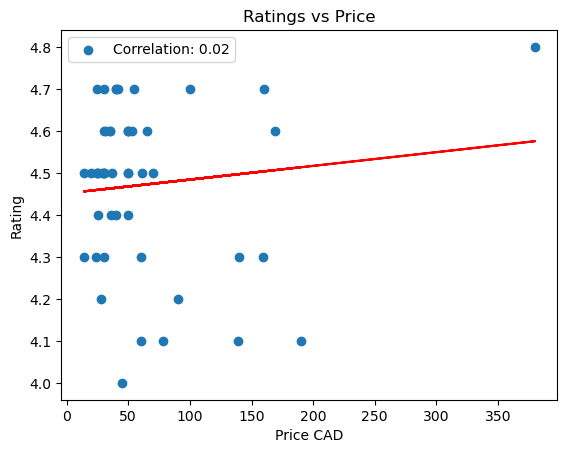

<Figure size 640x480 with 0 Axes>

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file
data = pd.read_csv('/Users/chac/Desktop/Class/Project_3/Project-3/data/electronics.csv') #change the path to your own

# Preprocess the price column by removing the dollar signs
data['price'] = data['price'].str.replace('$', '')

# Convert the price column to float
data['price'] = data['price'].astype(float)

# Calculate the correlation coefficient
correlation = np.corrcoef(data['price'], data['rating'])[0, 1]

# Calculate the slope and intercept of the correlation line
slope = correlation / np.std(data['price'])
intercept = np.mean(data['rating']) - slope * np.mean(data['price'])

# Generate the plot comparing price vs rating
plt.title('Ratings vs Price')
plt.scatter(data['price'], data['rating'], label='Correlation: {:.2f}'.format(correlation))
plt.xlabel('Price CAD')
plt.ylabel('Rating')
plt.legend()
plt.plot(data['price'], slope * data['price'] + intercept, 'r-', label='Correlation Line')
plt.show()

# save image to be used later
plt.savefig('images/electronics_corr.png')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


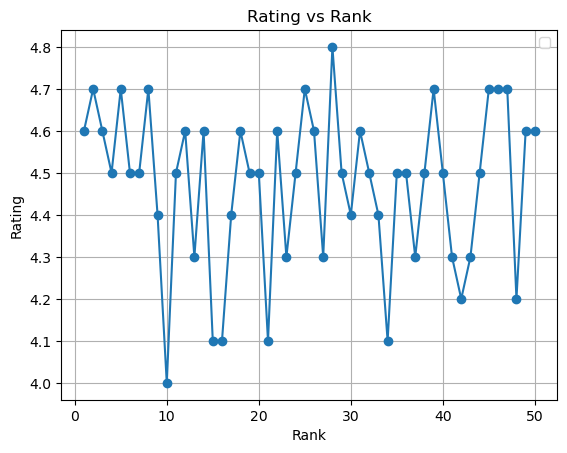

<Figure size 640x480 with 0 Axes>

In [34]:
# Preprocess the rank column by converting it to integer
data['rank'] = data['rank'].astype(int)

# Generate the line plot comparing rank vs rating
plt.title('Rating vs Rank')
plt.plot(data['rank'], data['rating'], marker='o', linestyle='-')
plt.xlabel('Rank')
plt.ylabel('Rating')
plt.legend()
plt.grid(True)
plt.show()

plt.savefig('images/electronics_line.png')